In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Predict whether Customer will exit the bank or not

In [9]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [10]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Feature Engineering

In [17]:
# One hot encoding
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [19]:
X=X.drop(['Geography','Gender'],axis=1)

In [21]:
X = pd.concat([X,geography,gender],axis=1)

In [22]:
#Split the dataset
from sklearn.model_selection import train_test_split

In [24]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=1)

In [25]:
#Feature scaling

from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train
X_train.shape

(7800, 11)

In [28]:
X_test

array([[-1.03264215,  0.77597927, -1.04731538, ..., -0.58307457,
        -0.57300774,  0.91607252],
       [ 0.30879517, -0.46967587, -0.70090456, ..., -0.58307457,
        -0.57300774,  0.91607252],
       [-1.22869838,  0.29688114, -1.04731538, ..., -0.58307457,
        -0.57300774, -1.09161663],
       ...,
       [ 0.84537009,  0.29688114, -1.04731538, ...,  1.71504651,
        -0.57300774, -1.09161663],
       [ 0.93823883, -0.27803661, -0.70090456, ..., -0.58307457,
        -0.57300774, -1.09161663],
       [ 1.05174507, -0.56549549, -0.35449374, ..., -0.58307457,
        -0.57300774,  0.91607252]])

In [30]:
# Creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

In [31]:
classifier = Sequential()

In [33]:
#input layer
classifier.add(Dense(units=11,activation='relu'))

In [34]:
#first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [35]:
#Second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [36]:
#Output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [37]:
#train NN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
#Early stopping
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=1,
)

In [44]:
model_history = classifier.fit(X_train, y_train, validation_split=0.3,batch_size=10,epochs=1000,callbacks=early_stop)

Epoch 1/1000
546/546 [==============================] - 2s 3ms/step - loss: 0.3257 - accuracy: 0.8648 - val_loss: 0.3416 - val_accuracy: 0.8607
Epoch 2/1000
546/546 [==============================] - 2s 4ms/step - loss: 0.3258 - accuracy: 0.8648 - val_loss: 0.3443 - val_accuracy: 0.8573
Epoch 3/1000
546/546 [==============================] - 2s 4ms/step - loss: 0.3263 - accuracy: 0.8641 - val_loss: 0.3457 - val_accuracy: 0.8564
Epoch 4/1000
546/546 [==============================] - 2s 4ms/step - loss: 0.3247 - accuracy: 0.8663 - val_loss: 0.3454 - val_accuracy: 0.8607
Epoch 5/1000
546/546 [==============================] - 3s 5ms/step - loss: 0.3238 - accuracy: 0.8672 - val_loss: 0.3486 - val_accuracy: 0.8598
Epoch 6/1000
546/546 [==============================] - 2s 4ms/step - loss: 0.3247 - accuracy: 0.8661 - val_loss: 0.3467 - val_accuracy: 0.8590
Epoch 7/1000
546/546 [==============================] - 2s 3ms/step - loss: 0.3240 - accuracy: 0.8650 - val_loss: 0.3433 - val_accuracy:

In [48]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

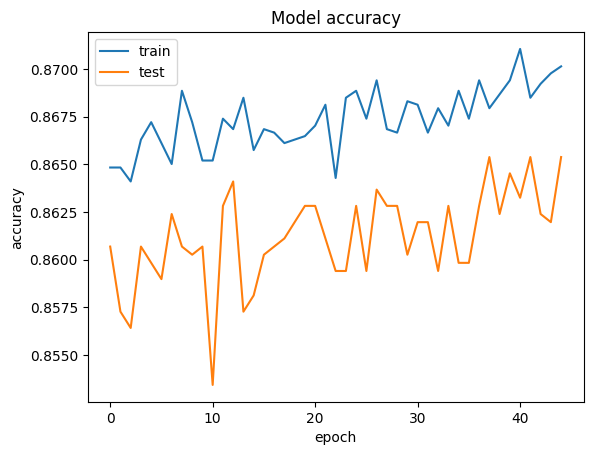

In [51]:
#Plot accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

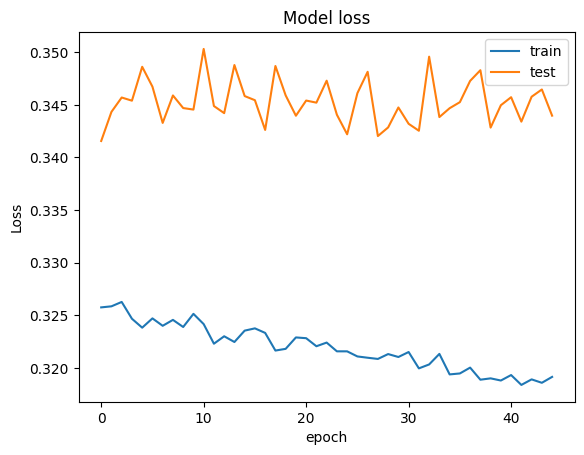

In [52]:
#Plot loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

In [53]:
#Predicting using test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)

69/69 [==============================] - 0s 3ms/step


In [54]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [55]:
cm

array([[1679,   69],
       [ 240,  212]])

In [56]:
#Calculate metrics
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [57]:
score

0.8595454545454545

In [58]:
#Get weights
classifier.get_weights()

[array([[ 0.32684606,  0.22591923, -0.28792667,  0.21193281,  0.265657  ,
          0.48882523, -0.16339198,  0.529008  , -0.26834226,  0.03979274,
          0.20596452],
        [ 0.5917548 ,  0.78843427, -1.0795703 ,  0.21933155, -0.70743746,
         -1.1914243 ,  0.47212997,  0.08988418, -0.2710176 , -0.08319011,
         -0.11219048],
        [ 0.12445191,  0.03121374,  0.43554989, -0.09765331, -0.20835997,
         -0.16162203,  0.2758083 , -0.59370625,  0.5589678 , -0.10824207,
         -0.53539145],
        [-0.621162  ,  0.83763075,  0.2607477 ,  0.21145783, -0.04552783,
          0.43262744, -0.04094097,  0.17173545,  0.64475346, -0.28373268,
          0.5685845 ],
        [ 0.2192865 , -0.16771908,  0.49114785,  0.8186907 ,  0.19574992,
         -0.4850777 ,  0.8476583 ,  0.21205446,  0.06708087, -1.0768417 ,
          0.88186866],
        [-0.0886443 ,  0.13560162, -0.14775406,  0.03783229, -0.09752788,
          0.3293339 ,  0.3789999 ,  0.82539874, -0.20972623, -0.1101885